# Model and Hyper Parameter tuning 
Scikit learn supports multiple algorithms for various regression and classification analysis. One of the easiest ways to find the best performing data is to run your data through multiple models to see what performs best. However every model has its own set of hyper paramters so you may also want to take a single model and run through a series of hyper paramters to find what set of paramters produce the best results

What are hyper paramters?

- Hyper paramters are the options that each algorithm has to alter the algorithms behaviour. Selecting the correct set of options can drasticatly effect the coefficients the algorithm learns
- In this link Jason Brownlee clearly explains what hyper parameters are and how they are different to model paramters https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/

<a id='Contents'></a>
## Contents
<b>

- [1 Resources ](#"1") 
- [2 Prepare the Data](#"2") 
- [3 K fold Validation ](#3)    
- [4 Hyper Parameters](#5) 
- [6 Model selection](#6) 
- [7 Combined model selection and hyper param tuning ](#7) 


</b>



---
<a id="1"></a>
# 1 Resources
[Back to Contents](#Contents)

- Tuning Parameters in scikit learn https://scikit-learn.org/stable/modules/grid_search.html
- Tutorial with code in google colab on hyper param tuning https://pyimagesearch.com/2021/05/17/introduction-to-hyperparameter-tuning-with-scikit-learn-and-python/


In [1]:
# General packages
import pandas as pd
import numpy as np
import time

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# sklearn models used below
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# sklearn data splitting
from sklearn.model_selection import train_test_split

# sklearn pre-processing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# sklearn hyperparameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# sklearn tree plotting
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import export_graphviz

# feature importance
from sklearn.inspection import permutation_importance

# sklearn model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay

---
<a id="2"></a>
# 2 Prepare the Data
[Back to Contents](#Contents)


In [2]:
import sklearn
from sklearn import datasets
import pandas as pd

cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
y = pd.DataFrame(cancer['target'])


In [3]:
X = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
y = pd.DataFrame(cancer['target'])

In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


Infomation on the wine dataset can be found here

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [6]:
# https://scikit-learn.org/stable/common_pitfalls.html#controlling-randomness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('number of rows in training data are',len(X_train))
print('number of rows in test data are',len(X_test))

number of rows in training data are 455
number of rows in test data are 114


In [7]:
clf1 = DecisionTreeClassifier()# default parameter arguments

# Fit the above decision tee to the training data
clf1.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



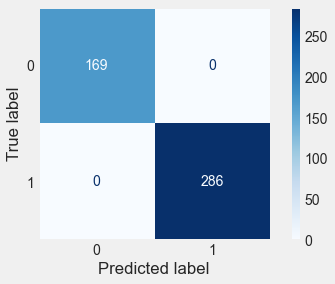

In [8]:

# 3 Use the tree to predict on training data
y_pred = clf1.predict(X_train)

# 4 Report back a comparison of the tree's prediction with the truth
print(classification_report(y_true=y_train, y_pred=y_pred))
ConfusionMatrixDisplay.from_estimator(estimator=clf1, X=X_train, y=y_train,cmap=plt.cm.Blues)
plt.grid(False);

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



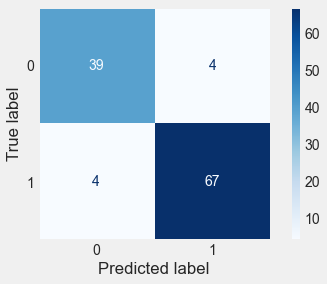

In [9]:
y_pred = clf1.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))
ConfusionMatrixDisplay.from_estimator(estimator=clf1, X=X_test, y=y_test,cmap=plt.cm.Blues)
plt.grid(False);

### 3 Cross validation (CV) on training data only

**Scikit learn User Guide: https://scikit-learn.org/stable/modules/cross_validation.html**

Cross validation lets us evaluate how well our chosen hyperparameters might generalise to new data **without** peeking at the tests data.

> *When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.*

> *However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.*

> *A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets.*

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Let us walk through these two images together. Here is the overall workflow we will follow. 

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" style="width: 400px;"/>

And here is how cross validation works.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" style="width: 600px;"/>

*Images from: https://scikit-learn.org/stable/modules/cross_validation.html*

### 4 Hyperparamter tuning


We can manually attempt to tune our algorithm to improve the performance on the training dataset. As stated above when performing your tuning it is reccomended you do not tune from the result of your test data however instead on the result of k fold validation of the training data. We shall manually attempt to tune our DT 

Lets first create a function to do k fold validation on what ever model we select. We can also repeat this process to get some statistics on our validation. In the code below we create a function that will take our training data and for n number of repeats will divide it into k folds fit the algorithm on the training folds, test it on the testing fold and store an accuracy. This process is repeated to get a mean and standard deviation

In [10]:
import numpy as np
from sklearn.model_selection import KFold

def cross_validate(X, y, model, split_number =3 , rep = 3, verbose = True):
    mean_test = []
    mean_train = []
    for j in range(rep):
        kf = KFold(n_splits=split_number)
        kf.get_n_splits(X)
        test_scores = []
        train_scores = []
        for train_index, test_index in kf.split(X):
            X_train_kf, X_test_kf = X.iloc[train_index,:], X.iloc[test_index,:]
            y_train_kf, y_test_kf = y.iloc[train_index,:], y.iloc[test_index,:]
            model.fit(X_train_kf, y_train_kf.values)
            test_score = model.score(X_test_kf, y_test_kf)
            test_scores.append(test_score)
            train_score = model.score(X_train_kf, y_train_kf)
            train_scores.append(train_score)
        mean_test.append(np.mean(test_scores))
        mean_train.append(np.mean(train_scores))
    if verbose:                     
        print('mean_test_score: ', np.mean(mean_test),'std_test_score: ', np.std(mean_test))
        print('mean_train_score: ', np.mean(mean_train),'std_rain_score: ', np.std(mean_train))
    return np.mean(mean_test), np.std(mean_test), np.mean(mean_train), np.std(mean_train)




Lets fit our k fold scoring system to our first manual model with the following parameters

In [11]:
clf2 = DecisionTreeClassifier(max_depth=5,
                             min_samples_leaf = 10)

In [12]:
test_mean, test_std, train_mean, train_std= cross_validate(X_train, y_train, clf2)

mean_test_score:  0.934065295689555 std_test_score:  0.0
mean_train_score:  0.9593465925539922 std_rain_score:  0.0


We can see the accuracy seems reasonable. Lets see if we can improve the result on the testing data

In [13]:
clf2 = DecisionTreeClassifier(max_depth=5,
                             min_samples_leaf = 5)
test_mean, test_std, train_mean, train_std= cross_validate(X_train, y_train, clf2)

mean_test_score:  0.9157323496378917 std_test_score:  0.002067563687679996
mean_train_score:  0.9681221411614845 std_rain_score:  0.0


The test score reduced there. Lets instead increase min_samples_leaf

In [15]:
clf2 = DecisionTreeClassifier(max_depth=5,
                             min_samples_leaf = 15)
test_mean, test_std, train_mean, train_std= cross_validate(X_train, y_train, clf2)

mean_test_score:  0.9275153944463809 std_test_score:  0.0
mean_train_score:  0.9461525099878408 std_rain_score:  0.0


We could try changing the max depth

In [16]:
clf2 = DecisionTreeClassifier(max_depth=3,
                             min_samples_leaf = 10)
test_mean, test_std, train_mean, train_std= cross_validate(X_train, y_train, clf2)

mean_test_score:  0.934065295689555 std_test_score:  0.0
mean_train_score:  0.9593465925539922 std_rain_score:  0.0


We can see we are not doing a great job at inmproving accuracy however we can automate this process below

### 4 Hyperparamter tuning with `GridSearchCV`

**Scikit learn user guide: https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search**

Wouldn't it be great if we could do this Cross validation for a selection of different hyperparameter combinations automatically rather than manually?

That's what [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) does. The `CV` part means Cross validation, and `GridSearch` will cross validate different hyperparameter settings we pass it.

So instead of us manually trying different settings, let us provide a range and let GridSearchCV do the hard work for us!



In [17]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7],       # increase the range up to 10
              'min_samples_leaf': range(1,10)} # increase the range up to 30

cv = StratifiedKFold(n_splits=5) #"Generate test sets such that all contain the same distribution of classes, or as close as possible." https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold

tree= DecisionTreeClassifier()
grid1 = GridSearchCV(tree,
                    param_grid=param_grid,
                    cv=cv,
                    verbose=1,
                    refit=True, # Refits the best model on all the training data so you can use grid1 to make predictions (default argument)
                    n_jobs=-1, # -1 means using all processors
                    scoring='accuracy') # https://scikit-learn.org/stable/modules/model_evaluation.html
grid1.fit(X_train,y_train)                    

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': range(1, 10)},
             scoring='accuracy', verbose=1)

In [18]:
grid1_results = pd.DataFrame.from_dict(grid1.cv_results_)
grid1_results.sort_values(by=['rank_test_score']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
40,0.007239,0.001077,0.001952,0.000543,6,5,"{'max_depth': 6, 'min_samples_leaf': 5}",0.945055,0.912088,0.945055,0.934066,0.934066,0.934066,0.012038,1
38,0.011646,0.008940,0.002405,0.000505,6,3,"{'max_depth': 6, 'min_samples_leaf': 3}",0.923077,0.901099,0.978022,0.956044,0.912088,0.934066,0.028656,1
22,0.006085,0.000395,0.001405,0.000213,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",0.945055,0.912088,0.945055,0.934066,0.934066,0.934066,0.012038,1
49,0.007371,0.000998,0.001620,0.000199,7,5,"{'max_depth': 7, 'min_samples_leaf': 5}",0.945055,0.912088,0.945055,0.934066,0.934066,0.934066,0.012038,1
29,0.006563,0.000493,0.001797,0.000443,5,3,"{'max_depth': 5, 'min_samples_leaf': 3}",0.912088,0.912088,0.967033,0.956044,0.923077,0.934066,0.023051,1


The grid results can be a bit hard to read, so we can first strip the table down to the important bits or view it in a graph

In [20]:
grid1_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by=['rank_test_score']).head(20)

,params,mean_test_score,std_test_score,rank_test_score
40,"{'max_depth': 6, 'min_samples_leaf': 5}",0.934066,0.012038,1
38,"{'max_depth': 6, 'min_samples_leaf': 3}",0.934066,0.028656,1
22,"{'max_depth': 4, 'min_samples_leaf': 5}",0.934066,0.012038,1
49,"{'max_depth': 7, 'min_samples_leaf': 5}",0.934066,0.012038,1
29,"{'max_depth': 5, 'min_samples_leaf': 3}",0.934066,0.023051,1
13,"{'max_depth': 3, 'min_samples_leaf': 5}",0.934066,0.017024,1
31,"{'max_depth': 5, 'min_samples_leaf': 5}",0.934066,0.012038,1
20,"{'max_depth': 4, 'min_samples_leaf': 3}",0.934066,0.024076,1
10,"{'max_depth': 3, 'min_samples_leaf': 2}",0.931868,0.010767,9
14,"{'max_depth': 3, 'min_samples_leaf': 6}",0.931868,0.016150,9


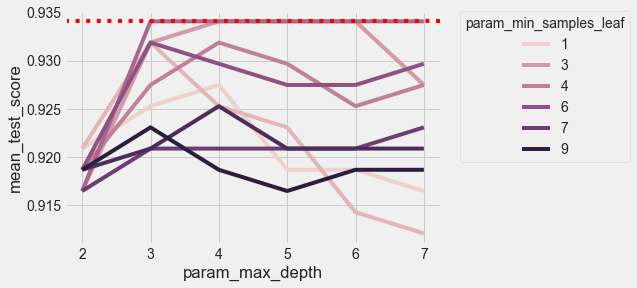

In [21]:
sns.lineplot(data=grid1_results,
             x='param_max_depth',
             y='mean_test_score',
             hue='param_min_samples_leaf')
plt.axhline(y=grid1_results['mean_test_score'].max(), color='r', linestyle=':')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='param_min_samples_leaf');


### RepeatedStratifiedKFold

However, what if we tried different splits of the data? Would grid search still return the same best estimator? 

We did this when we created our cross_validate function earlier. We repeated it. 

We can find this out using `RepeatedStratifiedKFold` and running the cross validation of 5 folds three times! Tripling the number of fits in our previous grid search.

Below we part follow the workflow in this scikit learn example: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py

And Jason Brownlee has a good explanation and example here: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

In [22]:
tree= DecisionTreeClassifier()

param_grid = {'max_depth' : range(2,8),      
              'min_samples_leaf': range(1,25)}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

grid2 = GridSearchCV(tree,
                    param_grid=param_grid,
                    cv=cv,
                    verbose=1,
                    n_jobs=-1, # -1 means using all processors
                    scoring='accuracy') 
grid2.fit(X_train,y_train)    

Fitting 15 folds for each of 144 candidates, totalling 2160 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 8),
                         'min_samples_leaf': range(1, 25)},
             scoring='accuracy', verbose=1)

In [23]:
results_df = pd.DataFrame(grid2.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
4_4,"{'max_depth': 4, 'min_samples_leaf': 4}",1,0.931136,0.031967
3_3,"{'max_depth': 3, 'min_samples_leaf': 3}",1,0.931136,0.027057
6_4,"{'max_depth': 6, 'min_samples_leaf': 4}",3,0.930403,0.029668
5_3,"{'max_depth': 5, 'min_samples_leaf': 3}",3,0.930403,0.028843
3_4,"{'max_depth': 3, 'min_samples_leaf': 4}",5,0.929670,0.032301
...,...,...,...,...
2_11,"{'max_depth': 2, 'min_samples_leaf': 11}",135,0.908425,0.031254
2_13,"{'max_depth': 2, 'min_samples_leaf': 13}",141,0.907692,0.031030
2_7,"{'max_depth': 2, 'min_samples_leaf': 7}",141,0.907692,0.030506


We can see that after repeated testing the best score was not the same as for single testing

Now that we have the best hyper params we can retrain our model on those params


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



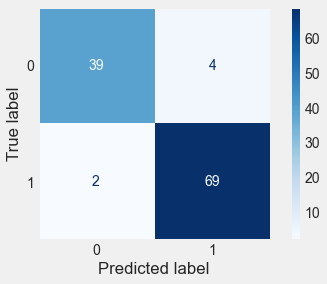

In [24]:
y_pred = grid2.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

ConfusionMatrixDisplay.from_estimator(estimator=grid2, X=X_test, y=y_test,cmap=plt.cm.Blues)
plt.grid(False);

This set of steps can be applied to any scikit learn algorithm to search for the best hyper paramters. There is also a randomized search that looks for random paramaters within a defined range , see https://scikit-learn.org/stable/modules/grid_search.html.   Other platforms have alternative methods for searching for the best Hyper paramters. These include baysean methods that look to update the search range based on the initial results. 

In order to apply this method on other scikit learn algorthims simply search the documentaiton for the available hyper paramers and pass the ranges in as a dictionary as we have done above for a decission tree. 

## Searching different algorithms 

We are now going to apply a similar logic where we through a number of different algorithm types at the problem. We will start off with the defult hyhper paramters for each algorithm and then once we have code for that we can impliment different hyper parameters for each algorithm. Please note that by applying this method we could be fitting thousands of different algorithms to the data which will take time on large datasets. In such case you will want to limit the number of algorithms you are putting in and the range of hyper paramters.

The algorithms we are exploring here are :
- Logisitic Regression
- Decission Tree
- Random Forest
- Gradient Boost Machine
- Extreme Gradient Boost Machine
- Naive Bayes
- Support Vector Machine (SVM)
- Stochasitic Graident Descent
- K Nearest Neighbour


Most of these algorithms belong to scikit learn and their documentation can found by searching on https://scikit-learn.org/stable/

![image info](https://scikit-learn.org/stable/_static/ml_map.png)



In [25]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.fixes import loguniform
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

### Scaling 

Note in the code below there is a parameter that is the second item in the list of the algorithms dictionary that is a boolean. This decides whether we need to apply numerical scaling to our inputs prior to using them with certain algorithms. Some algorithms require the standard deviation and the mean of each feature is the same where as other algorithms it does not matter. Where this paramter is set to True it is required and where it is set the False it is not required. If you have scaled you data before this step set all paramters to False and continue

In [28]:
scaler = StandardScaler()

algorithms = {'DT' :[DecisionTreeClassifier(), False], #  note the False represents not need for scaling
              'svm':  [svm.SVC(), True], # note the True indidcates this needs scaling
              'logit': [LogisticRegression(), False],
             'random forest' : [RandomForestClassifier(), False],
             'gradeint boosting' : [GradientBoostingClassifier(), False],
             'naive bayes': [GaussianNB(), False],
             'xgb': [xgb.XGBClassifier(), False],
             'sgd': [SGDClassifier(), True ],
             'knn' : [KNeighborsClassifier(n_neighbors=5), True]}

results = pd.DataFrame(columns = [ 'name', 'mean_train', 'std_train','mean_test', 'std_test'])


for alg in list(algorithms.keys()):
    clf = algorithms[alg][0]
    normalisation = algorithms[alg][1]
    if normalisation:
        scaler.fit(X_train)
        mean_test, std_test, mean_train, std_train = cross_validate(pd.DataFrame(scaler.transform(X_train)), y_train, clf, split_number =3 , rep = 3, verbose = False)
    else:
        mean_test, std_test, mean_train, std_train = cross_validate(X_train, y_train, clf, split_number =3 , rep = 3, verbose = False)
        
    res_pd = pd.DataFrame({'name': alg,  'mean_train': [mean_train], 'std_train':[std_train], 'mean_test': [mean_test], 'std_test': [std_test]})
    results = pd.concat([results, res_pd])
    results.reset_index(drop = True, inplace = True)
    

In [29]:
results.sort_values('mean_test', ascending = False).reset_index(drop = True)

,name,mean_train,std_train,mean_test,std_test
0,xgb,1.0,0.0,0.967018,0.0
1,svm,0.98791,0.0,0.964796,0.0
2,knn,0.976916,0.0,0.962574,0.0
3,random forest,1.0,0.0,0.954557,0.004149
4,gradeint boosting,1.0,0.0,0.950147,0.001034
5,sgd,0.986806,0.001796,0.93986,0.002752
6,logit,0.949442,0.0,0.933978,0.0
7,naive bayes,0.937344,0.0,0.92525,0.0
8,DT,1.0,0.0,0.920869,0.001773


We can see we get different performance from each of the algorithms. However the default hyper paramters have been used. The cells of code below looks to search different hyper parameter ranges for each algorithm. First we must define the parameters that we want to search for for each of the algorithms we are thinking of using. We define these paramters in a dictionary like we did before

In [31]:
dt_params = {'max_depth' : range(2,8, 2),  'min_samples_leaf': range(5,10, 2)}

svm_params ={'C': [ 1, 0.01, 0.0001],
             'gamma': ['scale', 'auto'],
             'kernel': ['linear', 'rbf']}
rf_params = {'n_estimators': [10, 100, 300],
             'max_depth': [5, 10, 15],
             'min_samples_split' : [2, 5, 10],
             'min_samples_leaf' : [ 1, 3, 5]}
gb_params = {
    "n_estimators": [1, 5, 10, 50, 200],
    "max_leaf_nodes": [2, 5, 10],
    "learning_rate": [0.01, 0.1, 1]}            

log_r_params = {'penalty': ['l1', 'l2', 'none'],
         'C': [ 1, 0.01, 0.0001]}

xgb_params = {'gamma': [0,1],
              'learning_rate': [0.01,0.1, 1],
              'max_depth': [5,10, 15]}
              # 'n_estimators': [50,100, 150],
              # 'reg_alpha': [0,0.1,1, 50, 100],
              # 'reg_lambda': [0,0.1,1, 100]}
            
knn_params = {'n_neighbors' : [1, 3, 5, 7, 9, 15, 19]}



The code below first creates a dictionary that contains a dictionary where each algorithm has the classifier and the paramters assosiated with it. We then pass into a forloop each alforithm sequentially and apply a grid search on that algorithm. The results then get stored in a dataframe called results so that afterwards we can analyses the best performing algorithm and hyper paramters. Grid search is only returning the test results from the cross validation and these are the accuracy results we are going to use as an indicator to the algorithm that will perform best on our testing data. 


In order to know the hyper parameters to tune the following documentation can be used
- Decission Tree https://scikit-learn.org/stable/modules/tree.html
- Logisitic Regression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- Support Vector Machine https://scikit-learn.org/stable/modules/svm.html
- Random Forest https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Gradient Boosting https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- K nearest Neighbor  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
-XGBoost  https://xgboost.readthedocs.io/en/stable/python/python_intro.html

In [53]:
algorithms = {'log_reg': [LogisticRegression(), False, log_r_params],
              'DT' :[DecisionTreeClassifier(), False, dt_params],
              'svm': [svm.SVC(), True,  svm_params],
             'RF': [RandomForestClassifier(), False, rf_params],
             'gradeint boosting' : [GradientBoostingClassifier(),False,  gb_params],
             'xgb': [xgb.XGBClassifier(), False,  xgb_params],
             'knn':[KNeighborsClassifier(), True, knn_params]} 

results = pd.DataFrame(columns = [ 'name', 'params', 'mean_test_accuracy', 'mean_test_f1', 'mean_test_precision', 'mean_test_recall'])


for i in tqdm(range(len(list(algorithms.keys())))):
    alg = list(algorithms.keys())[i]
    print('staring :', alg)
    clf = algorithms[alg][0]
    param_grid = algorithms[alg][2]
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
    grid1 = GridSearchCV(clf,
                    param_grid=param_grid,
                    cv=cv,
                    verbose=1,
                    refit=False, # Refits the best model on all the training data so you can use grid1 to make predictions (default argument)
                    n_jobs=-1, # -1 means using all processors
                    scoring=['accuracy', 'f1', 'precision', 'recall'])
    normalisation = algorithms[alg][1]
    if normalisation:
        scaler.fit(X_train)
        grid1.fit(scaler.transform(X_train), y_train)  
    else:
        grid1.fit(X_train, y_train)  
        
    grid1_results = pd.DataFrame.from_dict(grid1.cv_results_)
    grid1_results = grid1_results[['params', 'mean_test_accuracy', 'mean_test_f1', 'mean_test_precision', 'mean_test_recall']].sort_values(
        by = 'mean_test_f1', ascending = False).reset_index(drop = True)
    grid1_results['name'] = pd.DataFrame([alg]*len(grid1_results))
    results = pd.concat([results, grid1_results]).sort_values(
        by = 'mean_test_f1', ascending = False).reset_index(drop = True)
    results.reset_index(drop = True, inplace = True)
    print('completed: ', alg)
print('fitted all models and parameters')
    

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

staring : log_reg
Fitting 9 folds for each of 9 candidates, totalling 81 fits


 14%|████████████                                                                        | 1/7 [00:05<00:35,  5.94s/it]

completed:  log_reg
staring : DT
Fitting 9 folds for each of 9 candidates, totalling 81 fits


 29%|████████████████████████                                                            | 2/7 [00:06<00:13,  2.61s/it]

completed:  DT
staring : svm
Fitting 9 folds for each of 12 candidates, totalling 108 fits


 43%|████████████████████████████████████                                                | 3/7 [00:06<00:06,  1.55s/it]

completed:  svm
staring : RF
Fitting 9 folds for each of 81 candidates, totalling 729 fits


 57%|████████████████████████████████████████████████                                    | 4/7 [00:41<00:44, 14.85s/it]

completed:  RF
staring : gradeint boosting
Fitting 9 folds for each of 45 candidates, totalling 405 fits


 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:51<00:25, 12.94s/it]

completed:  gradeint boosting
staring : xgb
Fitting 9 folds for each of 18 candidates, totalling 162 fits


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:57<00:10, 10.66s/it]

completed:  xgb
staring : knn
Fitting 9 folds for each of 7 candidates, totalling 63 fits


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:57<00:00,  8.28s/it]

completed:  knn
fitted all models and parameters


In [55]:
results.head(50)

(181, 6)

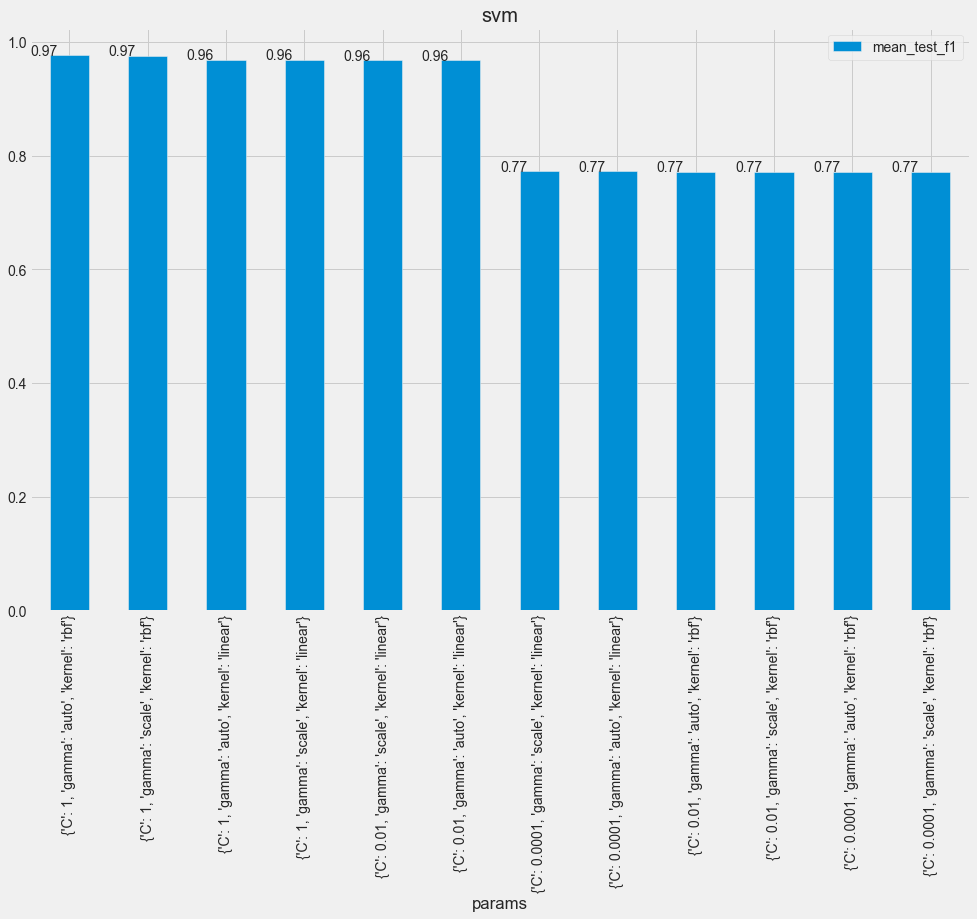

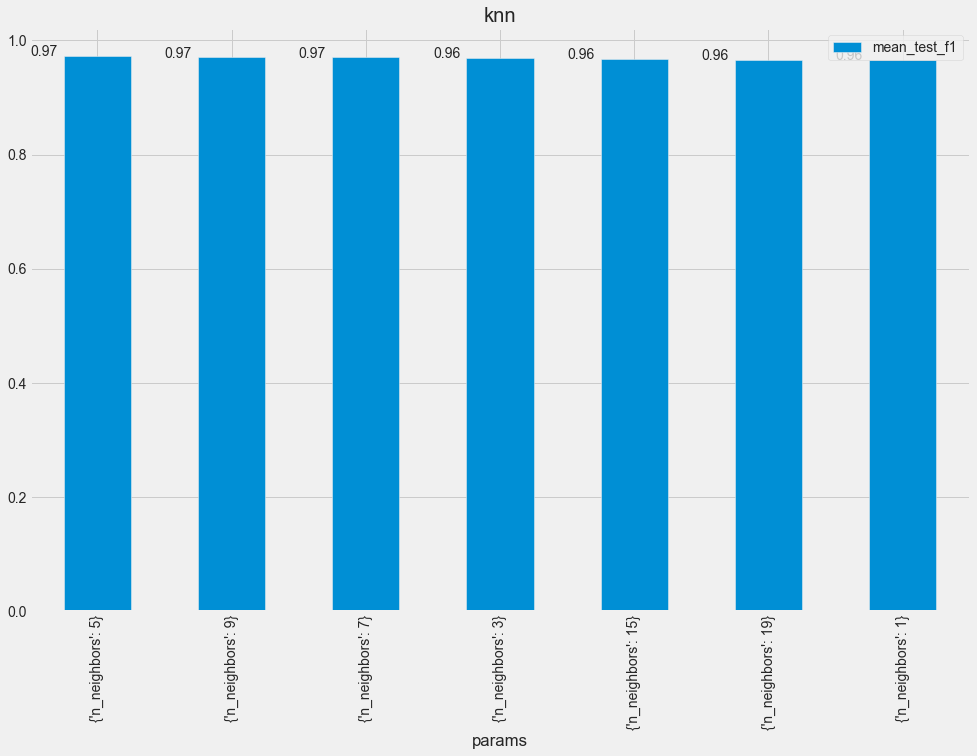

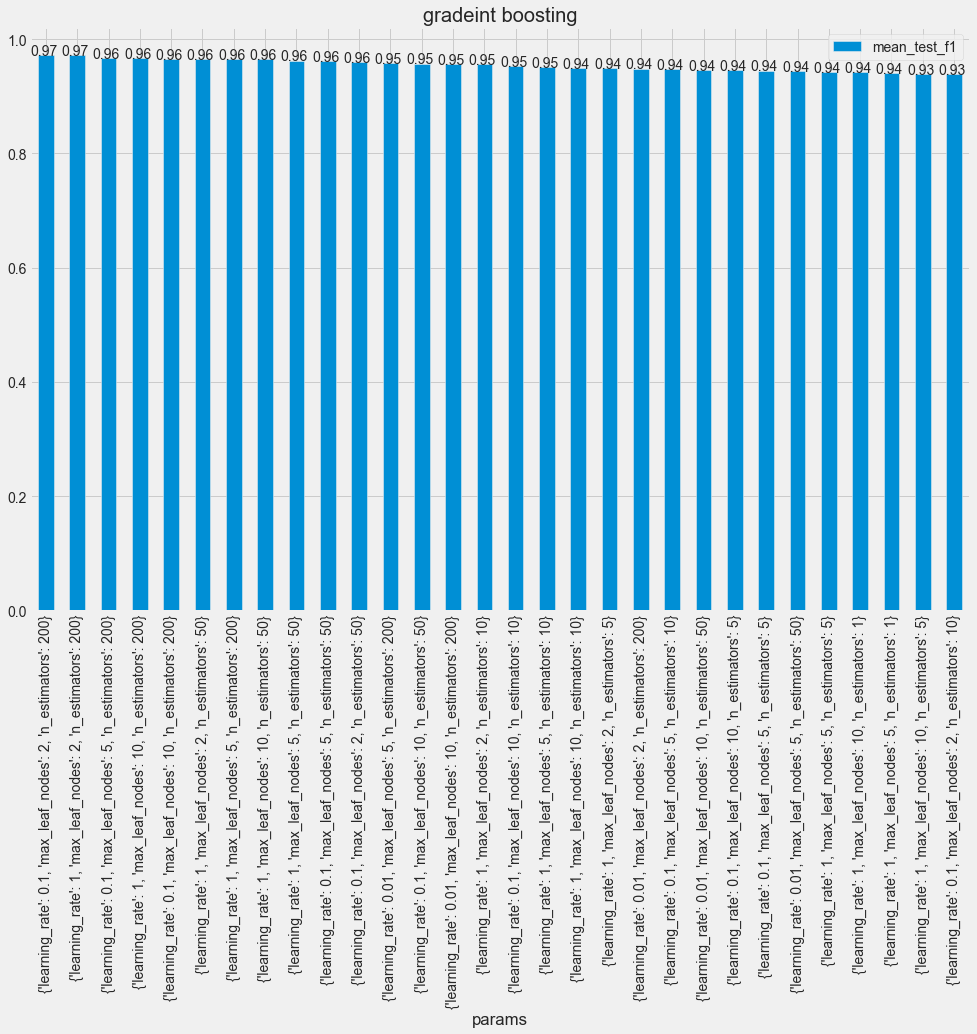

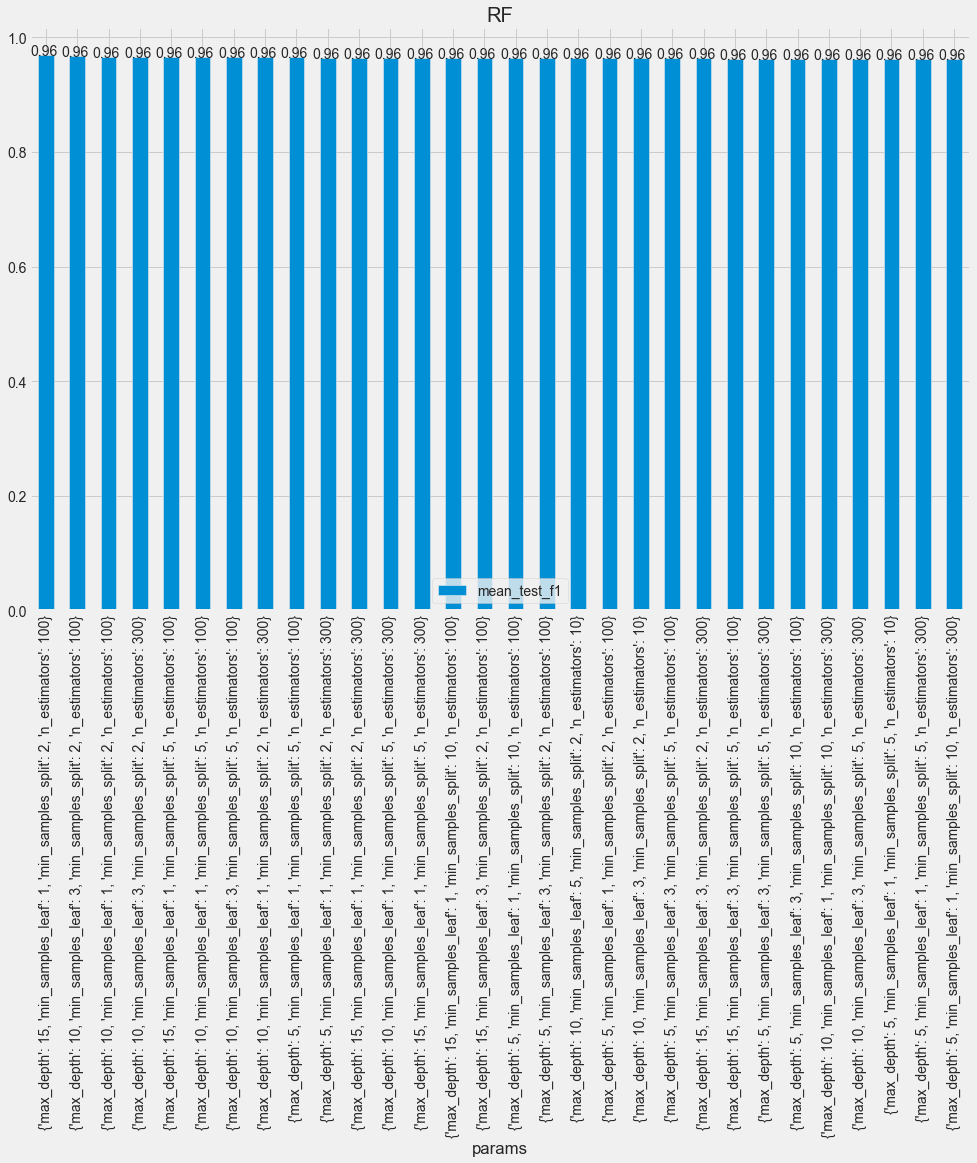

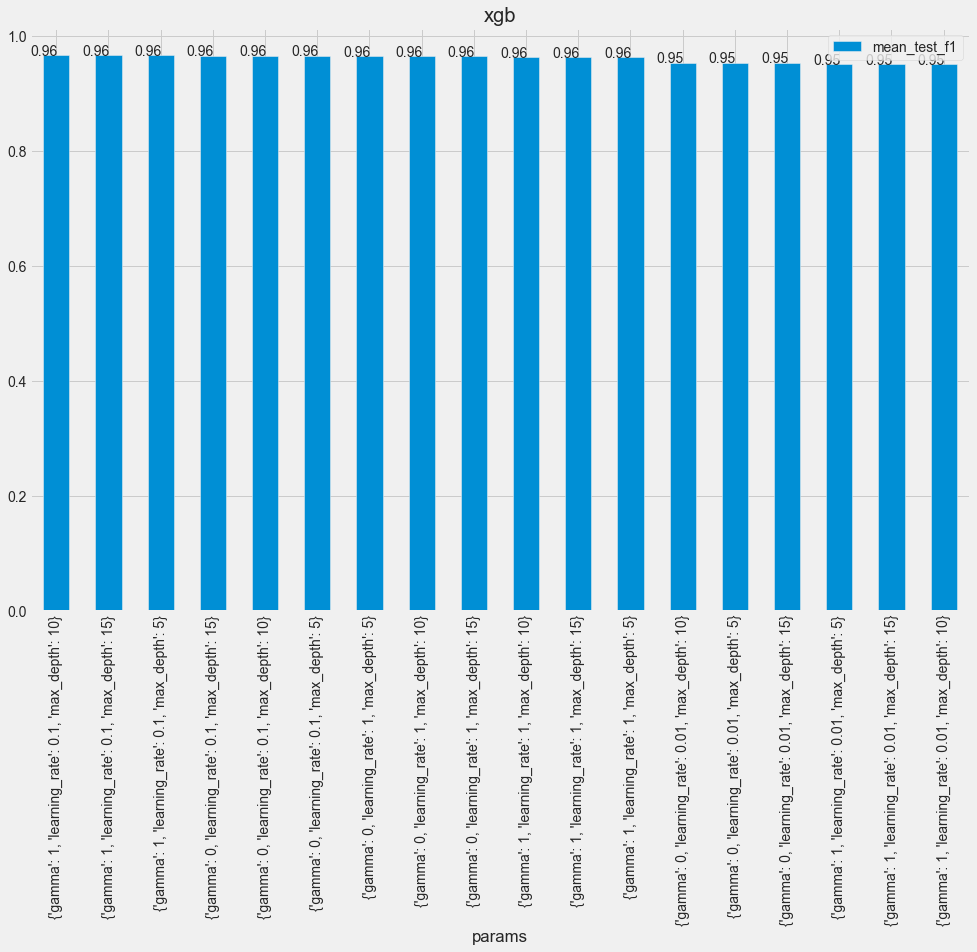

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


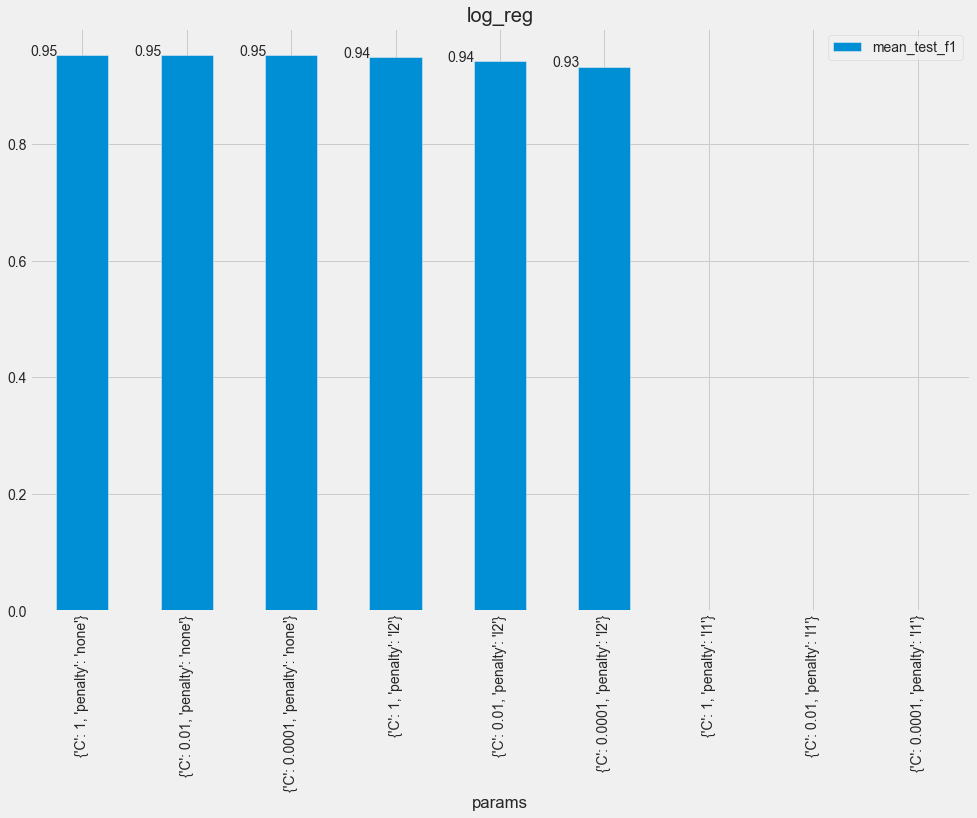

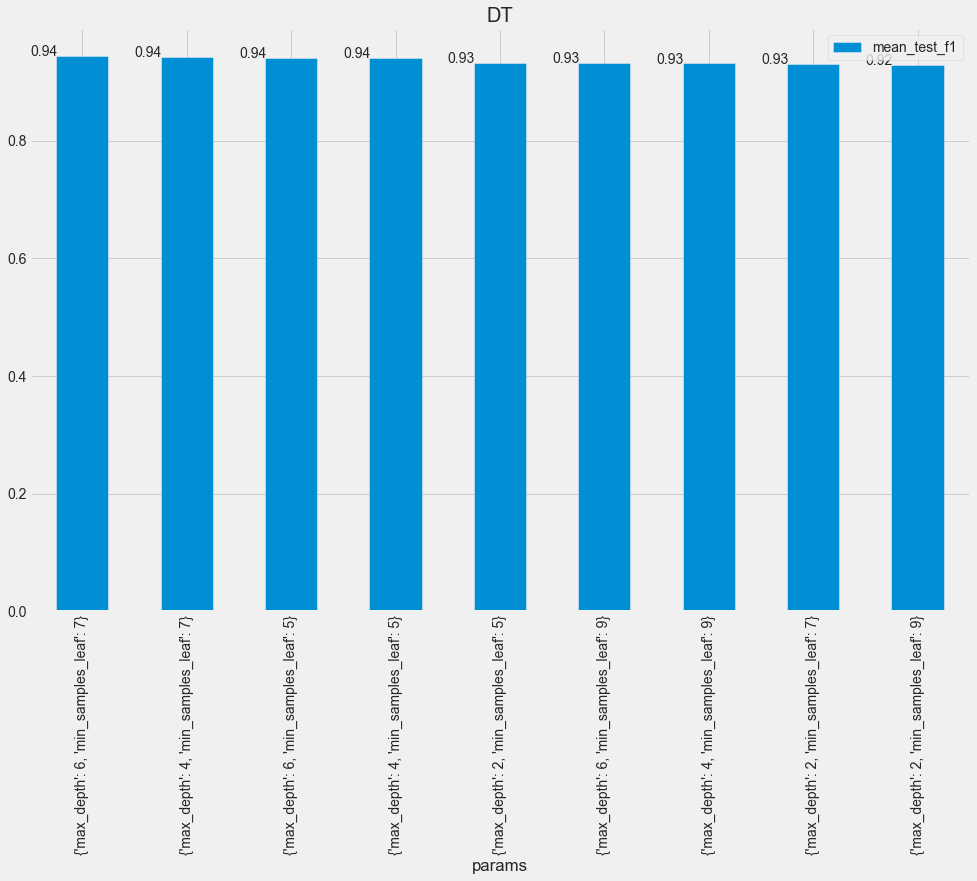

In [56]:
for alg in list(results.name.unique()):
    plt_df = results[results['name'] == alg]
    plt_df = plt_df.head(30)
    plt_df.plot(kind  = 'bar', x = str('params'), y = 'mean_test_f1')
    xlocs, xlabs = plt.xticks()
    xlocs=[i+1 for i in range(0,len(plt_df))]
    xlabs=[i/2 for i in range(0,len(plt_df))]
    for i, v in enumerate(plt_df.mean_test_f1):
        plt.text(xlocs[i]-1.5, v , str(v)[0:4])
    plt.title(alg)
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()
    

In [61]:
results.head(5)

,name,params,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall
0,svm,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.969928,0.976394,0.967203,0.985989
1,svm,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.969197,0.975818,0.966046,0.985989
2,knn,{'n_neighbors': 5},0.965532,0.973201,0.955414,0.991849
3,gradeint boosting,"{'learning_rate': 0.1, 'max_leaf_nodes': 2, 'n...",0.96482,0.972115,0.967839,0.976645
4,gradeint boosting,"{'learning_rate': 1, 'max_leaf_nodes': 2, 'n_e...",0.964123,0.971474,0.965536,0.97779


In [51]:
best_params = results.head(1).params[0]

In [ ]:
clf = GradientBoostingClassifier(**best_params)
clf.fit(X_train, y_train)

SVC(C=1, gamma='auto')

## Summary

This notebook has walked through the process of a brute force appraoch to finding the best model paramters to optimise for testing accuracy. The code can be tweaked to optimise for other parameters other than accuracy. Be careful if you are running code in this way that you do not select too many hyper paramter options since the code could take a very long time to run 